# Exploratory-Data-Analysis

In [31]:
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris

In [3]:
iris_dataset = datasets.load_iris()

In [7]:
df = pd.DataFrame(iris_dataset.data)
df.columns = iris_dataset.feature_names
df = df.join(pd.DataFrame(iris_dataset.target).rename(columns={0 : "target"}))

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Values are soo small that we don't need to scale them

In [17]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [56]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

There are no missing values

In [14]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Data is well balanced

## Scatter plot of sepal length and sepal width

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


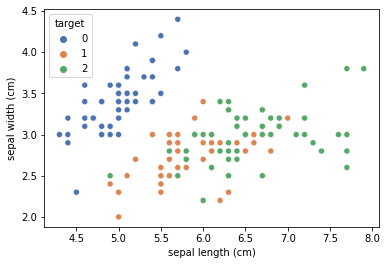

In [79]:
sns.scatterplot("sepal length (cm)", "sepal width (cm)", hue="target", data=df, palette="deep");

## Scatter plot of petal length and petal width

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


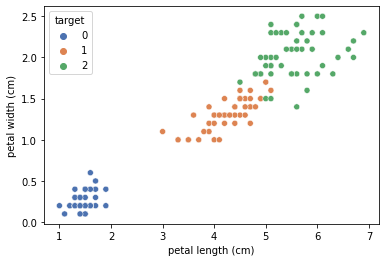

In [80]:
sns.scatterplot("petal length (cm)", "petal width (cm)", hue="target", data=df, palette="deep");

## Plotting all 4 features in 2D using PCA

In [101]:
from sklearn.decomposition import PCA

pca = pd.DataFrame(PCA(2).fit_transform(df.drop('target', axis=1)), columns=["PCA1", "PCA2"])
pca['target'] = df.target

In [102]:
pca.head(1)

,PCA1,PCA2,target
0,-2.684126,0.319397,0


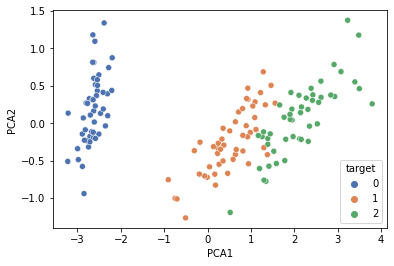

In [103]:
sns.scatterplot(x="PCA1", y="PCA2", data=pca, hue='target', palette="deep");